In [159]:
import pydot 
import theano
import theano.tensor as T

In [255]:
# Declare input values in Theano type
x1 = T.dscalar('x1')
x2 = T.dscalar('x2')
w1 = T.dscalar('w1')
w2 = T.dscalar('w2')
w3 = T.dscalar('w3')

# Form expression using overloaded +,-,*, and / operators
# Use special T methods to achieve other operations
s = 1 / (1 + T.exp(-1*(x1*w1+x2*w2+w3)))
s.name= "out" # just here so the printouts looks better

# Specify inputs we declared 
inputs = [x1,x2,w1,w2,w3]

# Call T.grad(s,_) on every input to represent gradient
gradients = [T.grad(s,i) for i in inputs]

# Combine all symbols into array that we want to have calculated
outputs = []
outputs.extend(inputs)
outputs.extend([s])
outputs.extend(gradients)

# Compile + Optimize function
logistic = theano.function(inputs, outputs)

# Perform computation
results = logistic(-1,-2,2,-3,-3)

for (k,v) in zip(outputs, results): print "%10s=%.03f"% (k,v)

        x1=-1.000
        x2=-2.000
        w1=2.000
        w2=-3.000
        w3=-3.000
       out=0.731
(dout/dx1)=0.393
(dout/dx2)=-0.590
(dout/dw1)=-0.197
(dout/dw2)=-0.393
(dout/dw3)=0.197


The output file is available at temp.png


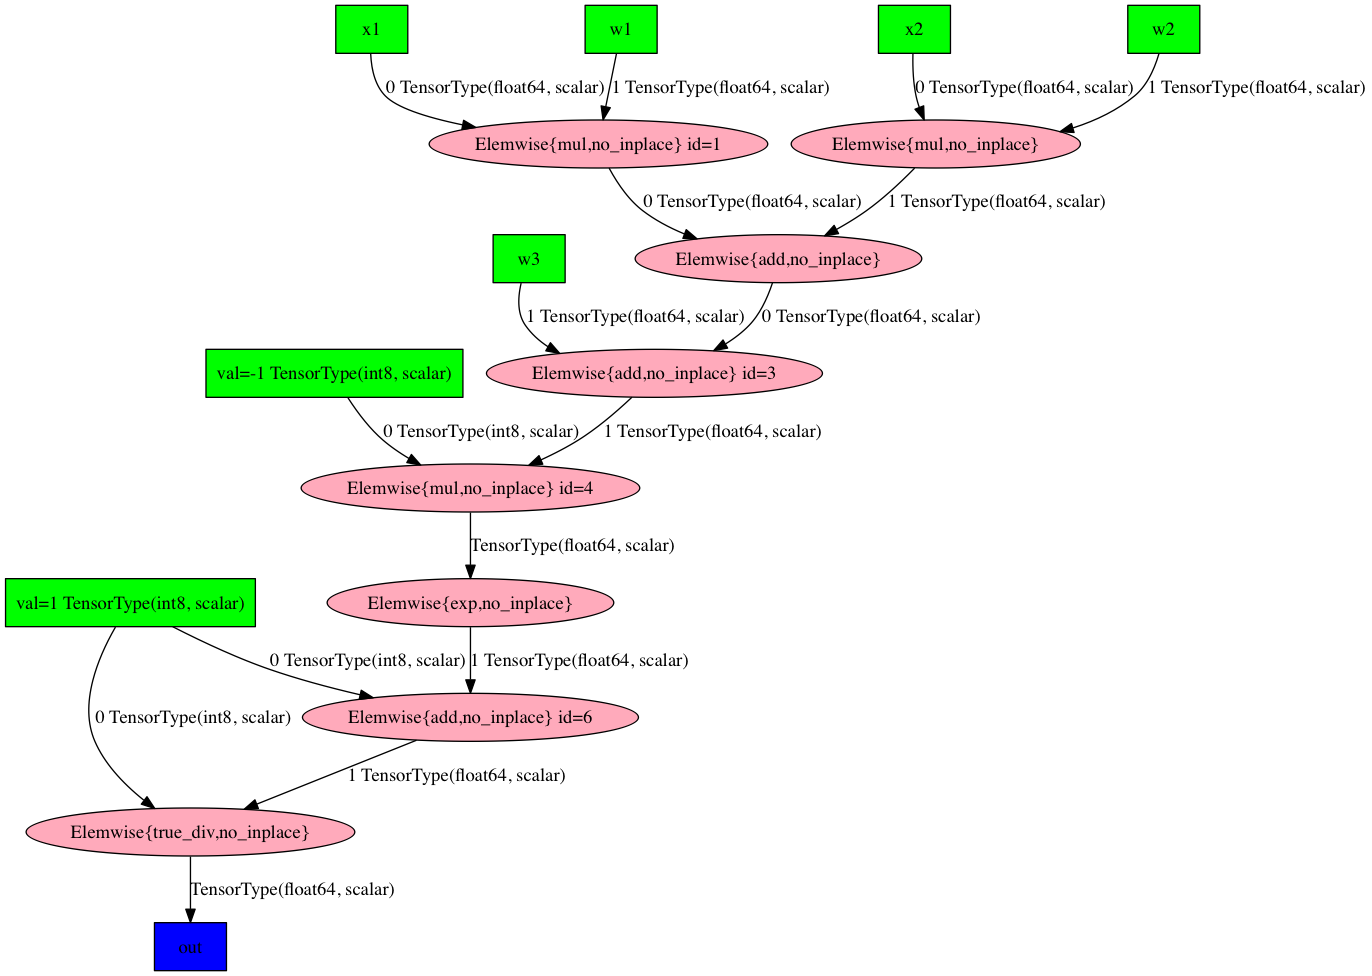

In [259]:
# Print computation graph of s because it has not 
# been optimized yet so we can see the full graph.
a = theano.printing.pydotprint(s, outfile="temp.png", var_with_name_simple=True) 
from PIL import Image                                                                
Image.open('temp.png')